# Project - E-commerce customer spending behavior prediction

### Project Objective: - Interpret which variables are contributing towards more annual income for an E-commerce clothing company which is trying to decide whether to focus their efforts on their mobile app or their website.

## Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [8]:
df = pd.read_csv('/content/Ecommerce_Customers.csv')
df

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


## Understanding the features: -

#### Categorical features:

##### 1. Email: Registered email of the customers
##### 2. Address: Registered physical address of the customers
##### 3. Avatar: Color avatar of the customer profiles

#### Numerical features:

##### 1. Avg. Session Length: Average session of in-store style advice sessions in minutes
##### 2. Time on App: Average time spent on App in minutes
##### 3. Time on Website: Average time spent on Website in minutes
##### 4. Length of Membership: How many years the customer has been a member
##### 5. Yearly Amount Spent: The total amount the customer is spending in dollars

## EDA

In [ ]:
df.dtypes

,0
Email,object
Address,object
Avatar,object
Avg Session Length,float64
Time on App,float64
Time on Website,float64
Length of Membership,float64
Yearly Amount Spent,float64


In [ ]:
df.isna().sum()

,0
Email,0
Address,0
Avatar,0
Avg Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [ ]:
# There are no null/missing values in the dataset.

In [9]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# There are no duplicate records in the dataset.

In [ ]:
df['Avatar'].value_counts()

,count
Avatar,
Teal,7
Cyan,7
CadetBlue,7
GreenYellow,7
SlateBlue,7
...,...
PaleGoldenRod,1
Coral,1
NavajoWhite,1


In [ ]:
# From above value counts we can see that there are 138 unique Avatars and is not limited to specific few colors in a dataset of 500 records, which may not give us
# deep understanding in customer spending patterns and thus making it a less important feature for our analysis.

In [ ]:
# Features like 'Email', 'Address' and 'Avatar' are textual columns and have no significant relevance in determining whether the company is gaining
# profits from either mobile app or website.

# Therefore we will remove these features from our study.

In [ ]:
df.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)
df

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


## Data Visualization - Scatter plots

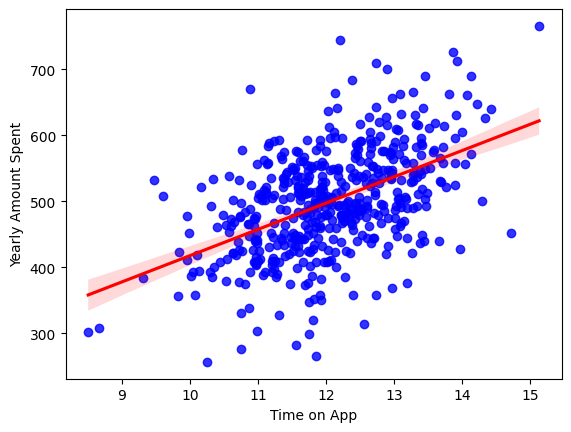

In [ ]:
sns.regplot(x='Time on App', y='Yearly Amount Spent', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

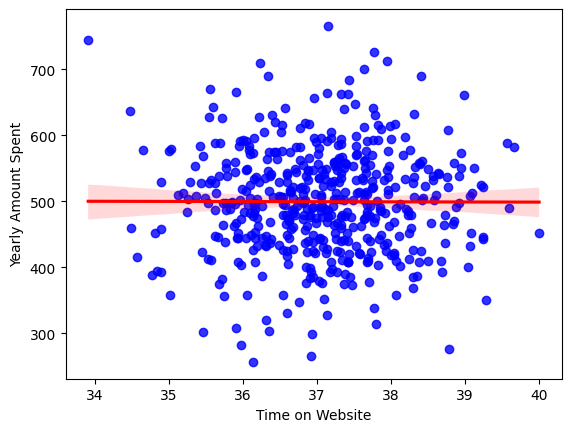

In [ ]:
sns.regplot(x='Time on Website', y='Yearly Amount Spent', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [ ]:
# From above 2 plots we can see that Yearly Amount Spent by the customers increases as they spend more time on App.
# But, Yearly Amount Spent by the customers neither increases or decreases and remains fairly unaffected as they spend more time on Website.

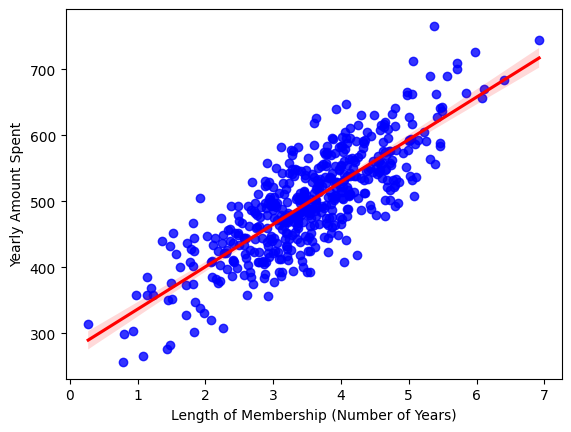

In [ ]:
sns.regplot(x='Length of Membership', y='Yearly Amount Spent', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Length of Membership (Number of Years)')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [ ]:
# Above plot depicts that as the company's customers' start having more number of years being a member they start spending more money.

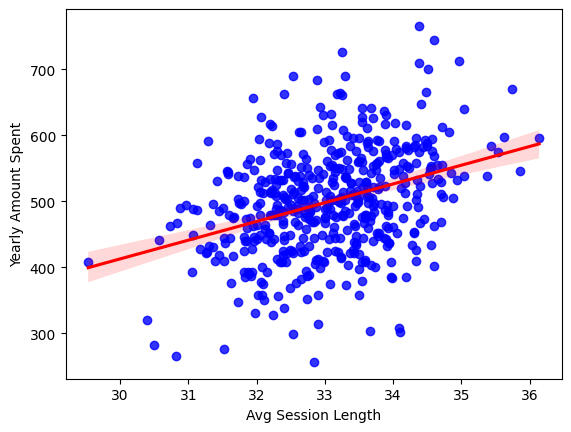

In [ ]:
sns.regplot(x='Avg Session Length', y='Yearly Amount Spent', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Avg Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [ ]:
# Above plot suggests that more the number of style advice minutes a customer recieves in store, the more likely he/she is to
# be convinced to spend more money and buy more clothes online either on company's Website or App.

## Data Visualization - Box-plots

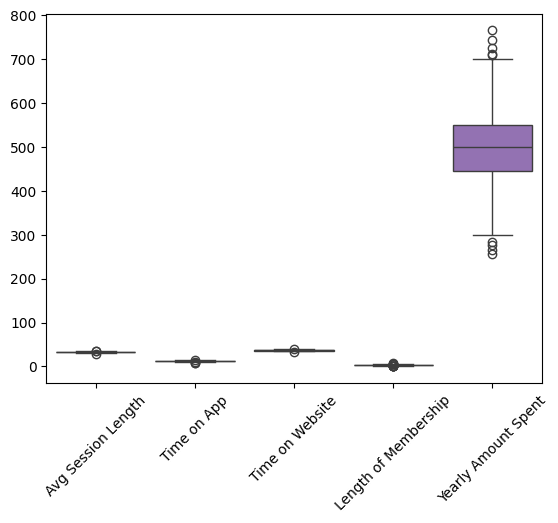

In [ ]:
sns.boxplot(df)
plt.xticks(rotation=45, ha='center')
plt.show()

In [ ]:
# Calculating outliers at each variable

# Define numerical columns
num_cols = ['Time on App', 'Time on Website', 'Length of Membership', 'Avg Session Length', 'Yearly Amount Spent']

# Calculate IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))

# Count number of outliers per column
outlier_counts = outliers.sum()
print(outlier_counts)

Time on App              4
Time on Website          2
Length of Membership    12
Avg Session Length       3
Yearly Amount Spent      9
dtype: int64


In [ ]:
4+2+12+3+9

30

In [ ]:
# Total number of outliers (30) are not that significant in number compared to the total number of observations (500), plus they might be showing
# a realistic picture of spending behavior of the customers, thus we will keep the outliers untreated.

## Data Visualization - Pairplots for feature relationships

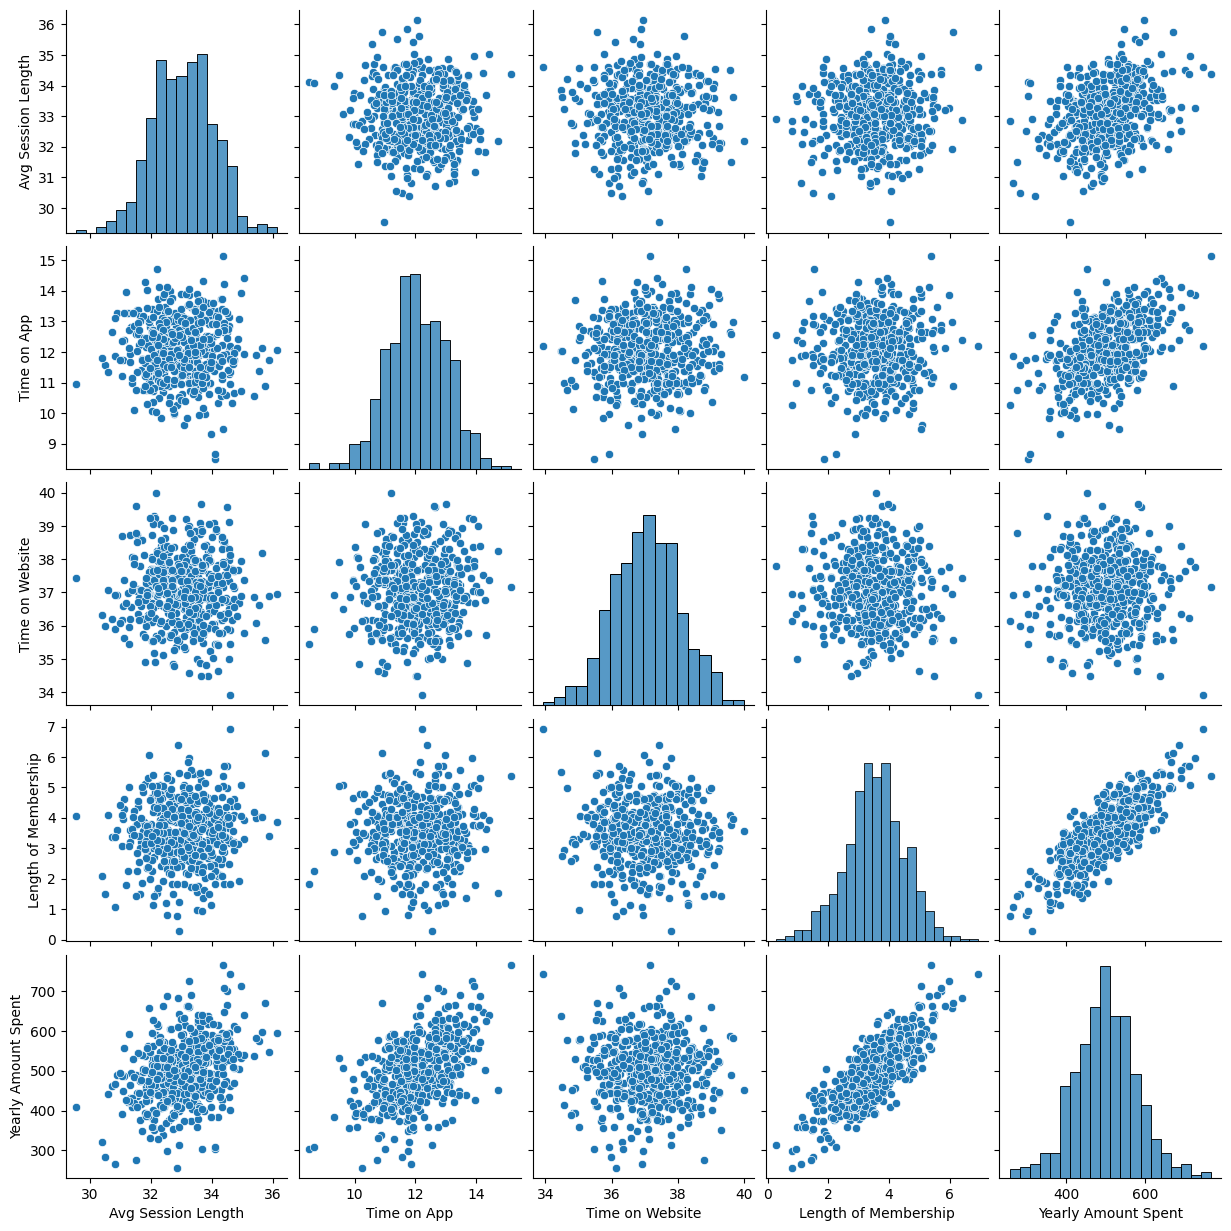

In [ ]:
sns.pairplot(df)

## Data Visualization - Correlation Heatmap

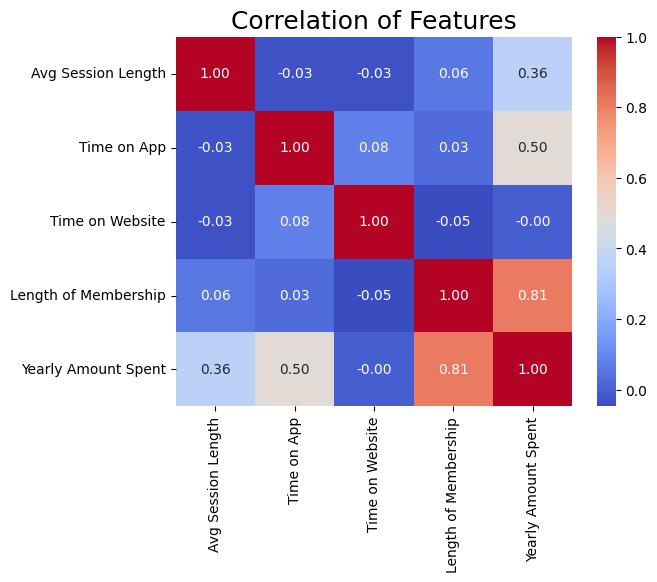

In [ ]:
# Checking correlation of features with target variable -> 'Yearly Amount Spent'

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of Features', size = 18)
plt.show()

In [ ]:
# From the above heatmap we can clearly see that 'Length of Membership' has the highest positive correlation with the Target variable - 'Yearly Amount Spent'
# 'Time on App' and 'Avg Session Length' features have a moderate positive correlation with the Target variable, whereas 'Time on Website' feature shows
# neither positive nor negative correlation with the Target variable, which was also concluded in the earlier regression plot.

In [ ]:
# The heatmap provides a visual representation of the correlation matrix. High correlation coefficients (positive or negative) between
# independent variables are a key indicator of multicollinearity. From above heatmap we can see there is no multicollinearity issue in the dataset.

## Data Visualization - KDE plots

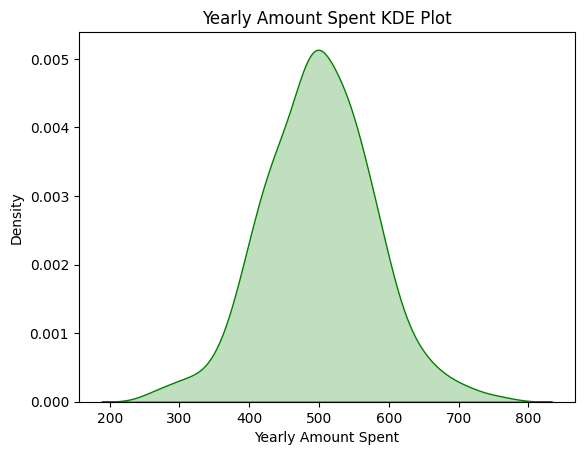

In [ ]:
sns.kdeplot(data=df, x='Yearly Amount Spent', fill=True, color='green')
plt.title('Yearly Amount Spent KDE Plot')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Density')
plt.show()

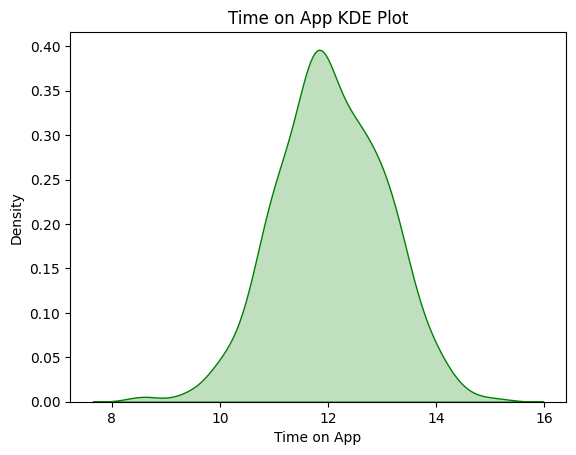

In [ ]:
sns.kdeplot(data=df, x='Time on App', fill=True, color='green')
plt.title('Time on App KDE Plot')
plt.xlabel('Time on App')
plt.ylabel('Density')
plt.show()

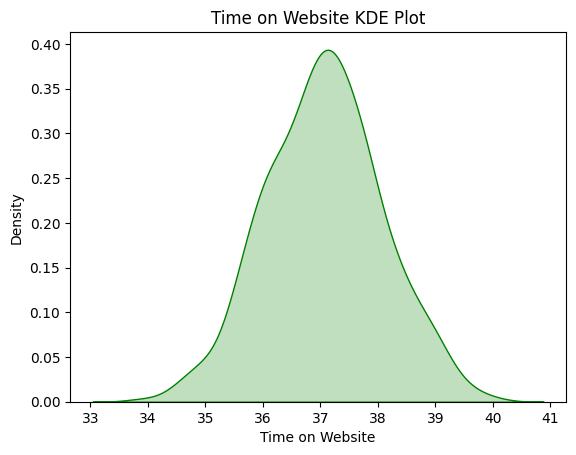

In [ ]:
sns.kdeplot(data=df, x='Time on Website', fill=True, color='green')
plt.title('Time on Website KDE Plot')
plt.xlabel('Time on Website')
plt.ylabel('Density')
plt.show()

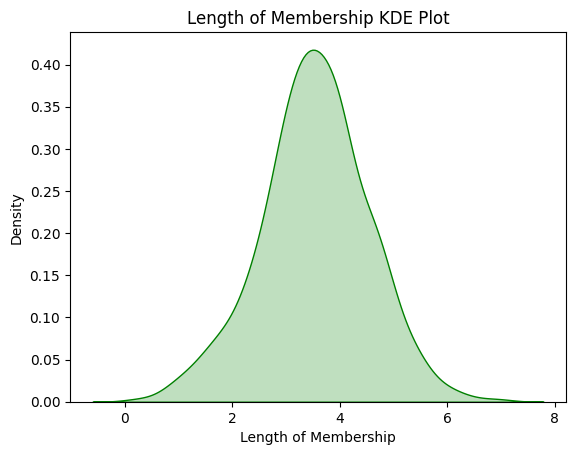

In [ ]:
sns.kdeplot(data=df, x='Length of Membership', fill=True, color='green')
plt.title('Length of Membership KDE Plot')
plt.xlabel('Length of Membership')
plt.ylabel('Density')
plt.show()

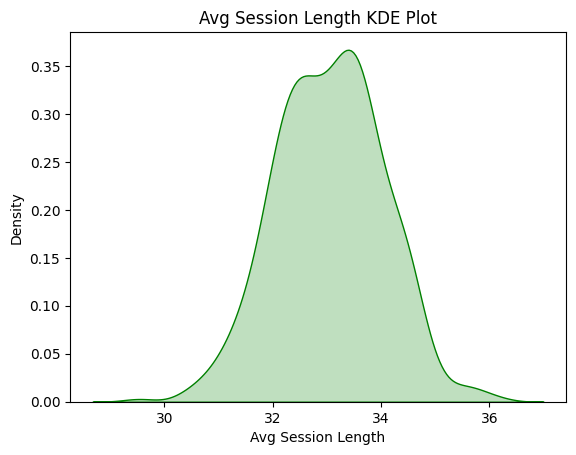

In [ ]:
sns.kdeplot(data=df, x='Avg Session Length', fill=True, color='green')
plt.title('Avg Session Length KDE Plot')
plt.xlabel('Avg Session Length')
plt.ylabel('Density')
plt.show()

In [ ]:
# The KDE plots for 'Yearly Amount Spent,' 'Time on App,' 'Time on Website,' 'Length of Membership,' and 'Avg Session Length'
# all show nearly normal distributions. We can draw following inferences from this: -

# 1. Customer Spending: The nearly normal distribution of 'Yearly Amount Spent' suggests that most customers spend around
#    the average amount, but has high variation as well suggesting some spending far more or less than the average amount.

# 2. App and Website Usage: The close to normal distributions of 'Time on App' and 'Time on Website' indicate that most customers
#    spend a similar amount of time respectively on these platforms.

# 3. Membership Duration: The normal distribution of 'Length of Membership' suggests that the customer base has a mix of new
#    and long-term members, with most falling somewhere in between.

# 4. Style Advice Sessions: The nearly normal distribution of 'Avg Session Length' indicates that most customers have similar
#    style advice session durations.

# EDA FINDINGS



*   No missing values in the dataset.
*   No duplicate records in the dataset.
*   All numerical features are normally distributed (mean ≈ median).
*   Low variance in session length and time spent on the app/website.
*   Yearly Amount Spent has high variation, suggesting customer spending habits
    differ significantly.
*   Length of Membership has a wide range, meaning some customers have been
    around much longer than others.
*   There are some outliers in all numerical columns. As the dataset contains
    500 elements and number of outliers is only 30 and also all the outlier values seem to be realistic so we can continue with the outliers.
*   No multicollinearity issue detected.









## Feature Scaling

In [ ]:
# The numerical features in the dataset have different units and varied range.
# Machine learning algorithms, such as linear regression, logistic regression, k-nearest neighbors, and
# support vector machines, can be significantly affected by features having different scales.

# Standard Scaling can help these algorithms perform better by ensuring that all features contribute equally.

# Therefore, we will apply Standard Scaling on input features so that all the independent variables contribute equally.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

x = sc.fit_transform(df.drop(columns=['Yearly Amount Spent']))
x # Scaled input features

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 ],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926]])

In [ ]:
y = df['Yearly Amount Spent']
y # Target variable

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [ ]:
x.shape, y.shape

((500, 4), (500,))

## Model Building

In [ ]:
# We are using various regression models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVR, KNeighborsRegressor)
# on the same dataset to compare their performance and identify the model that best predicts customer spending behavior.
# This allows us to evaluate different algorithms and choose the most suitable one for our specific problem.

In [ ]:
# Import machine learning algorithms from scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
# Initialize and train models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(f'{name} trained.')

Linear Regression trained.
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.
SVR trained.
KNeighborsRegressor trained.


## Model Evaluation

In [ ]:
# Comparing metrics like R-squared, MSE, and MAE, so that we can gain insights into the strengths and weaknesses of each model
# and select the one that provides the most accurate and reliable predictions.

In [ ]:
results = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append([name, r2, mse, mae])

In [ ]:
# Create a Pandas DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Model', 'R-squared', 'MSE', 'MAE'])

In [ ]:
print('\nModel Evaluation Results:')
print(results_df)


Model Evaluation Results:
                 Model  R-squared          MSE        MAE
0    Linear Regression   0.980788   105.529438   7.772047
1        Decision Tree   0.875479   683.976256  20.505597
2        Random Forest   0.953176   257.198743  12.936835
3    Gradient Boosting   0.965072   191.857525  11.408099
4                  SVR   0.486468  2820.770105  40.452407
5  KNeighborsRegressor   0.905185   520.805302  18.734521


In [ ]:
# Melt the DataFrame to long format for easier plotting
results_melted = pd.melt(results_df, id_vars=['Model'], value_vars=['R-squared', 'MSE', 'MAE'], var_name='Metric', value_name='Score')

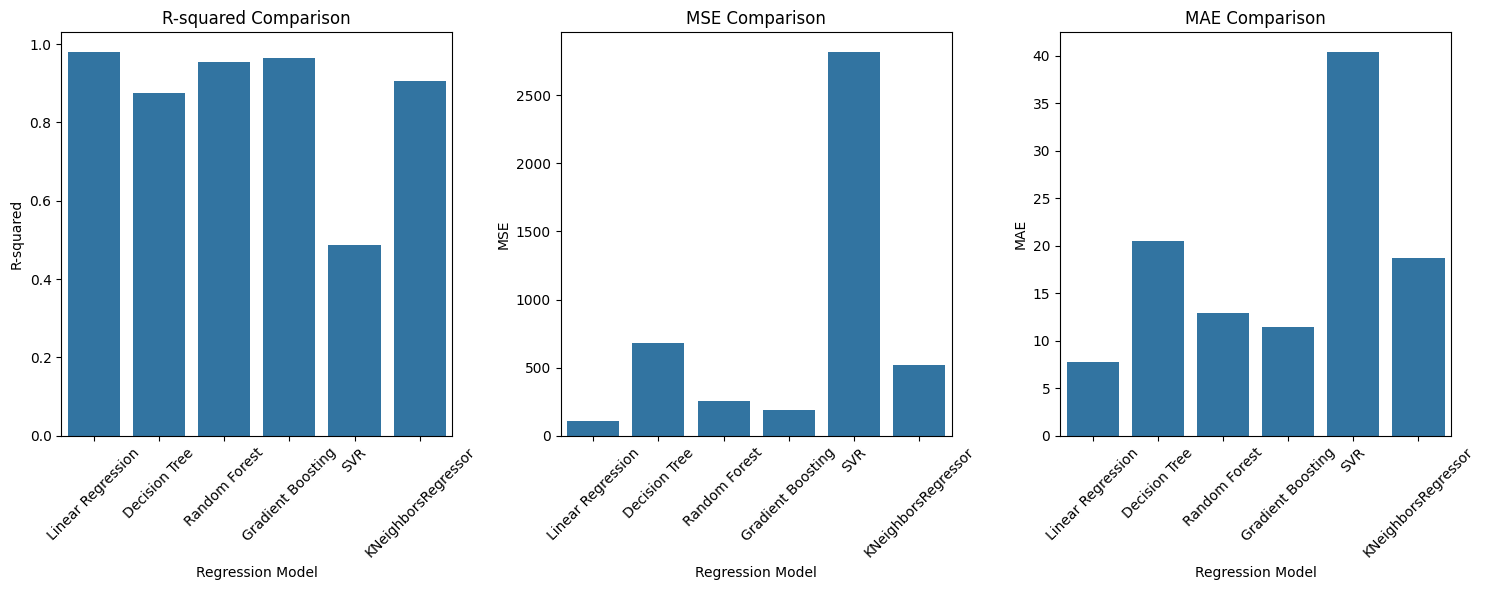

In [ ]:
metrics = ['R-squared', 'MSE', 'MAE']
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 6))

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y='Score', data=results_melted[results_melted['Metric'] == metric], ax=axes[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Regression Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Inference: -
It is clear from the above bar plots that 'Linear Regression' model achieves the highest R-squared value and the least error values (MAE and MSE) which makes it the most robust model for our business case.

## Linear Regression Model Co-Efficients

In [ ]:
# Let's find out co-efficients of linear regression model to see which features are the most significant in
# predicting the target variable.

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)
y_pred

array([501.45152791, 427.80034427, 623.45150941, 437.81592448,
       512.53573005, 489.50826001, 616.07503175, 553.78447641,
       511.7539264 , 518.27940796, 494.41120673, 619.31728868,
       507.70149458, 549.09835397, 500.29013774, 671.68383413,
       601.59568339, 528.17643865, 505.23590802, 455.66398061,
       488.96182878, 461.52854421, 398.60019833, 457.12754354,
       417.28530912, 486.65936518, 448.4785068 , 608.50767968,
       417.4617776 , 412.46430794, 450.06416468, 567.39115485,
       481.60884405, 505.25688509, 493.78477601, 595.00885515,
       577.78863357, 506.46965505, 384.39498212, 607.01971406,
       642.0203977 , 441.22384617, 523.91459166, 407.47413159,
       581.52083724, 422.46658813, 457.57278039, 578.54522966,
       563.97941187, 528.40143931, 337.92203191, 532.37041733,
       409.2239411 , 508.01608302, 511.97347405, 412.03762452,
       505.62730661, 509.19903699, 648.68696358, 514.33859065,
       435.17606401, 492.73681665, 538.06204794, 325.67

In [ ]:
# Print out the co-efficients of the linear regression model

lm.coef_

array([25.53157507, 38.52499171,  0.47528571, 61.34322258])

In [ ]:
features_names = df.drop(columns=['Yearly Amount Spent']).columns
features_names

Index(['Avg Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [ ]:
# Creating dataframe using model's co-efficients and original feature names

co_eff_df = pd.DataFrame(lm.coef_, index=features_names, columns=['Co-efficients'])
co_eff_df

,Co-efficients
Avg Session Length,25.531575
Time on App,38.524992
Time on Website,0.475286
Length of Membership,61.343223


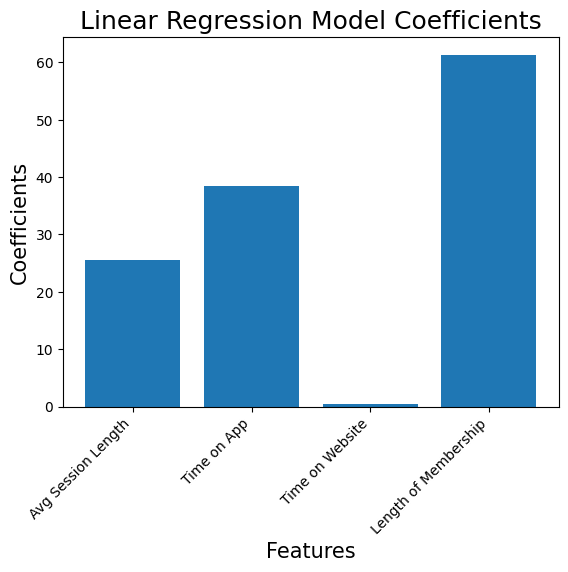

In [ ]:
plt.bar(co_eff_df.index, co_eff_df['Co-efficients'])
plt.title('Linear Regression Model Coefficients', size = 18)
plt.xlabel('Features', size = 15)
plt.ylabel('Coefficients', size = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

## Inference: -
Positive coefficients indicate a positive relationship with 'Yearly Amount Spent' that is, as the feature increases, spending tends to increase. Larger coefficients suggest a stronger influence on 'Yearly Amount Spent'.
Based on the above co-efficients of the features: -
1. Length of Membership seems to be the most important factor impacting customer spending in this model.
2. Time on App and Avg. Session Length also have notable positive impacts on the target variable.
3. Time on Website appears to have a negligible impact.


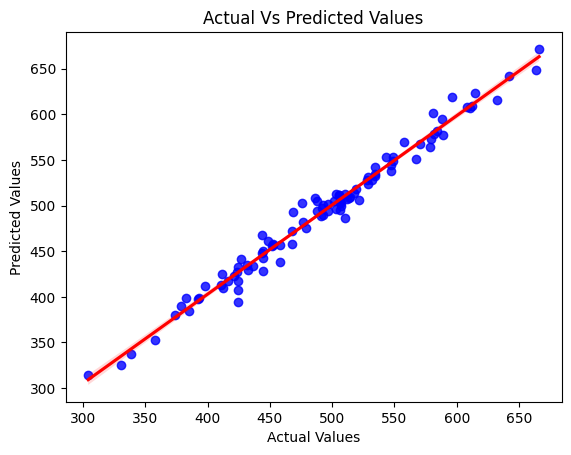

In [ ]:
# Visualizing the results

sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
plt.show()

In [ ]:
# A straight linear graph as above between Actual Values and Predicted Values indicates a strong positive correlation between
# the actual and predicted values. This suggests that the model is accurately predicting the target variable for the given test data.

In [ ]:
# A high R-squared value (0.9807) as achieved in our Linear regression model, might be misleading if the model is overfitting
# to the training data. The learning curve can reveal if there is overfitting issue by showing a large gap between
# the training and validation scores. On the contrary, if there is no significant gap between the training and validation scores
# then there is no overfitting issue present.

## Learning Curve - Overfitting check

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    lm, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

In [ ]:
# Calculate mean scores and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

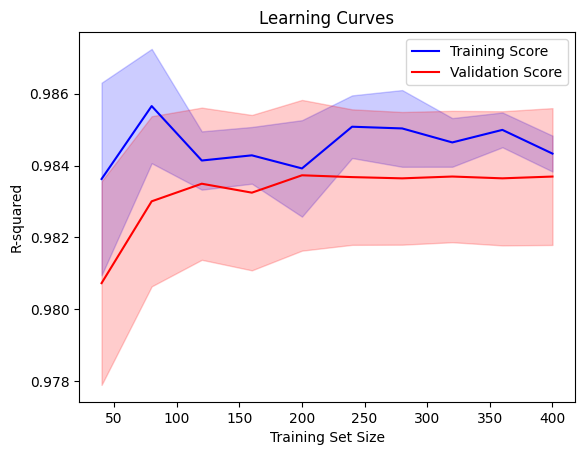

In [ ]:
# Plot the learning curves
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [ ]:
# From the above chart, we can see that training and validation scores show no significant gap in performance,
# therefore, there is no overfitting issue detected in our Linear Regression model. Also, high validation score (R-squared)
# indicates that the model is making accurate predictions on unseen data.

# The combination of these factors supports our conclusion that the Linear Regression model is appropriate for the task.

## CONCLUDING STATEMENTS: -
#### 1. Prioritize the Mobile App: The analysis strongly suggests that the mobile app is generating more revenue and has a greater impact on customer spending compared to the website. The company should continue investing in improving the app's user experience, adding new features, and promoting its usage to further increase customer engagement and revenue.
#### 2. Loyalty Programs: Since length of membership is a crucial factor, the company should focus on building strong customer loyalty programs. This could involve offering exclusive discounts, rewards, and personalized experiences to encourage repeat purchases and longer memberships.
#### 3. In-Store Style Advice: The positive correlation of the target variable with average session length suggests that in-store style advice sessions are valuable. The company should maintain or even expand these sessions to enhance customer engagement.
#### 4. Website Optimization: While the website's impact on revenue is currently limited, it's still an important touchpoint for customers. The company should consider optimizing the website's design and functionality to improve user experience and potentially increase its contribution to revenue. However, this should be a lower priority compared to the mobile app and loyalty programs.